In [1]:
from IPython.display import HTML

# <font color='red'>Tache 1: Introduction</font>

Dans ce projet, nous apprendrez à analyser un ensemble de données de transactions clients afin d'interpréter le comportement des clients d'un fournisseur



# <font color='red'>Tache 2: Analyse exploratoire des données</font>
## <font color='green'> Importation des librairies</font>
 

 

 

 


In [2]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [4]:
# Importer des données
filepath = r"C:\Users\Boubacar SOW\Dropbox\monpc\Desktop\FProjetM\Clustering K-Means et ACP Linéaire\Wholesale customers data.csv"
df= pd.read_csv(filepath)

In [5]:
#cinq premier lignes
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


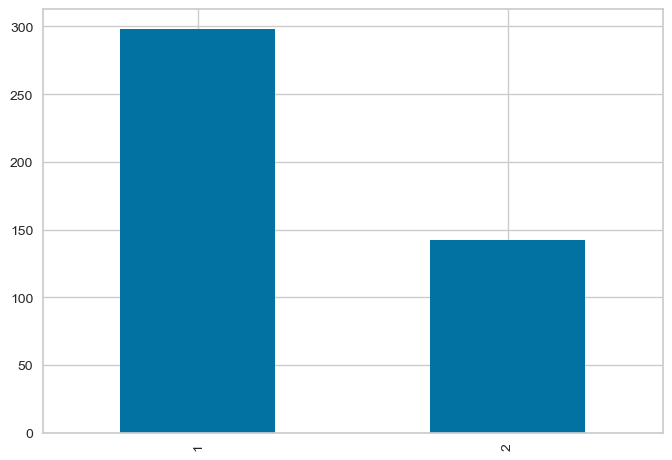

In [6]:
# types de distribution
df['Channel'].value_counts().plot(kind='bar');

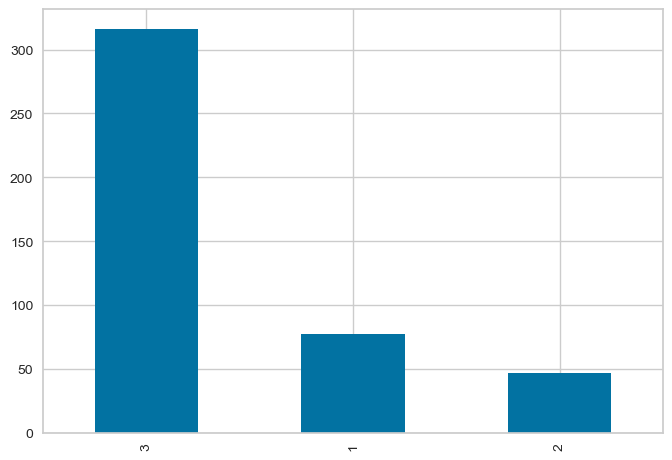

In [7]:
df['Region'].value_counts().plot(kind='bar');

In [8]:
# quelques changement de nom de variables et de modalités
df= df.rename(columns={'Delicassen':'Delicatessen'}) # Delicatessen:épicerie fine
df['Channel']= df['Channel'].map({1:'HoReca', 2:'Retail'}) # retail : vente au detail
df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'other'})

In [9]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [10]:
# Table de frequence de la  variable 'Region'
df['Region'].value_counts()

other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [11]:
# Table de frequence de la  variable normalisée
df['Region'].value_counts(normalize=True)

other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: Region, dtype: float64

In [12]:
# Stockage de noms des colonnes dans une liste
features= df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [13]:
# resume statisque
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [15]:
# Aprés le netteyer notre dataset

In [16]:
# Souvergarder df au format csv
df.to_csv('data_preprocessed.csv')

In [17]:
# importer les fichier 'data_preprocessed.csv'
df=pd.read_csv('data_preprocessed.csv', index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,HoReca,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [18]:
#structure de la dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


Il n'ya pas des valuer manquantes dans les données
passons par à la Visualisation des données.

## <font color='green'>  Visualisation des données.</font>

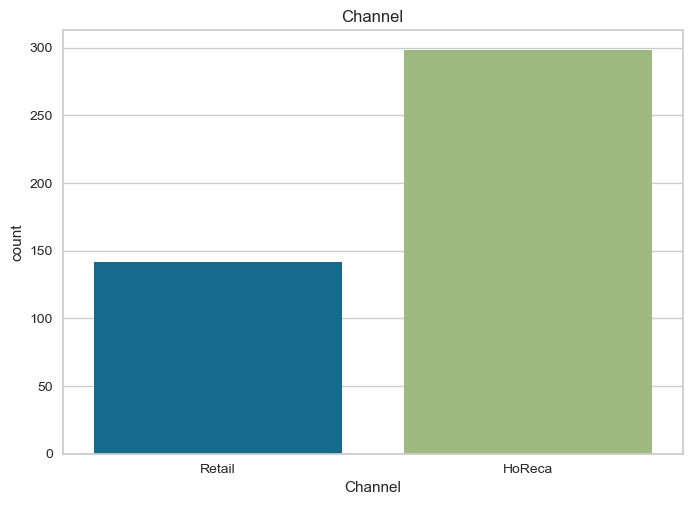

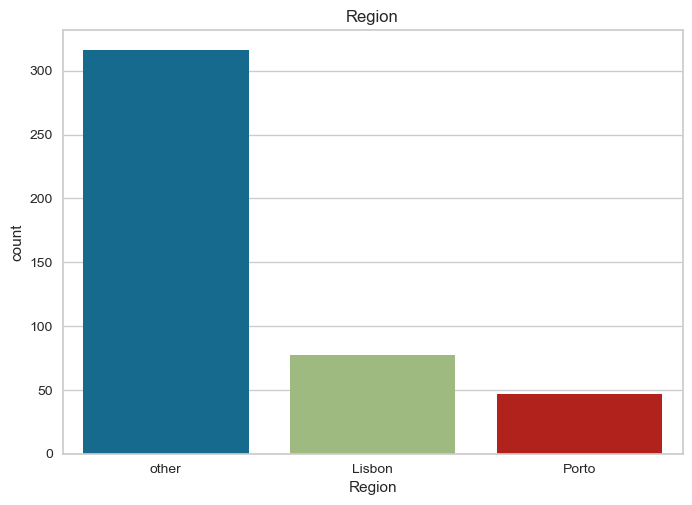

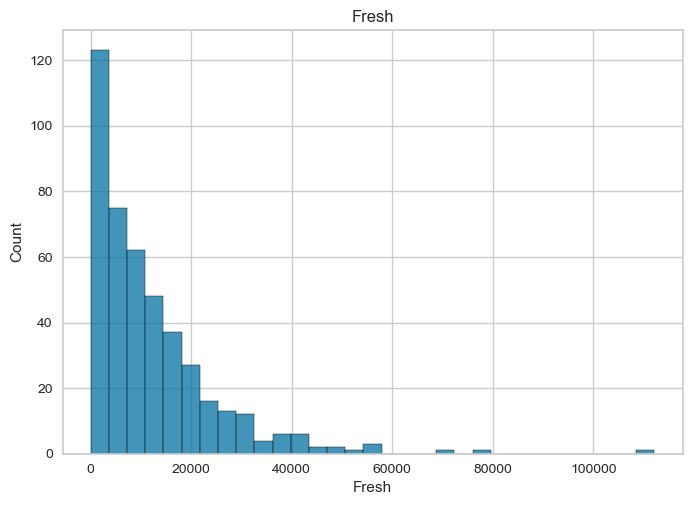

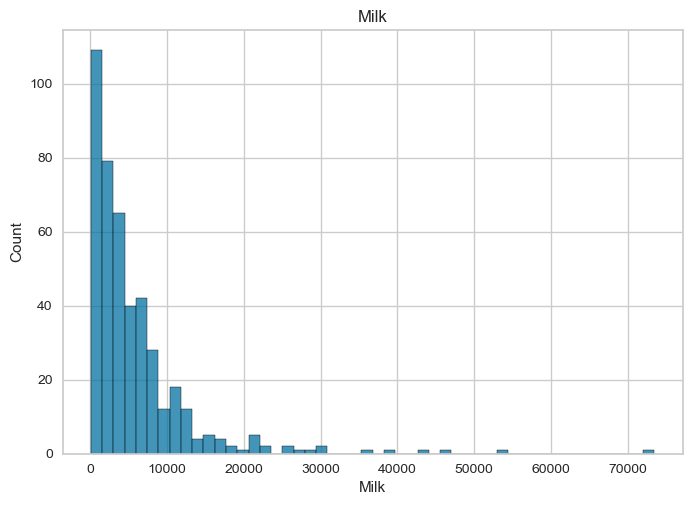

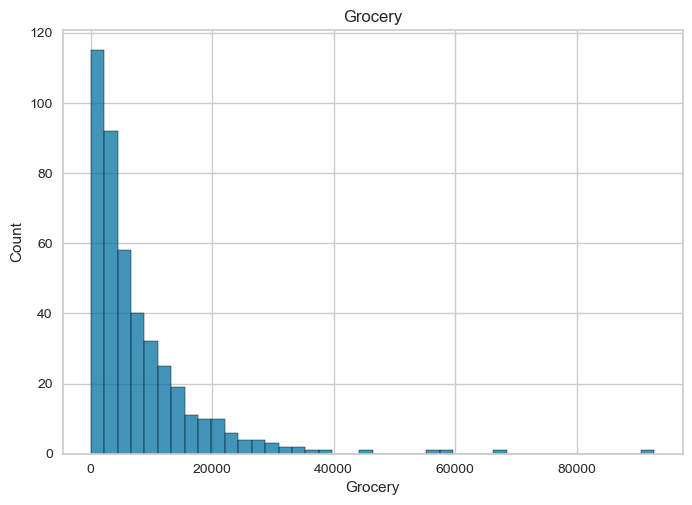

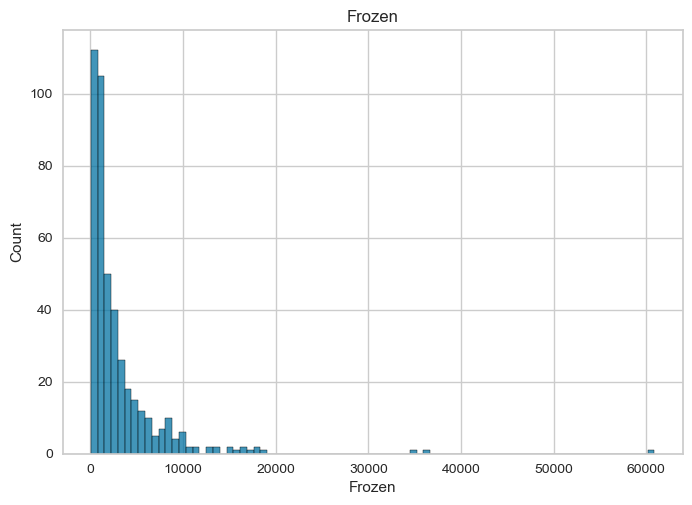

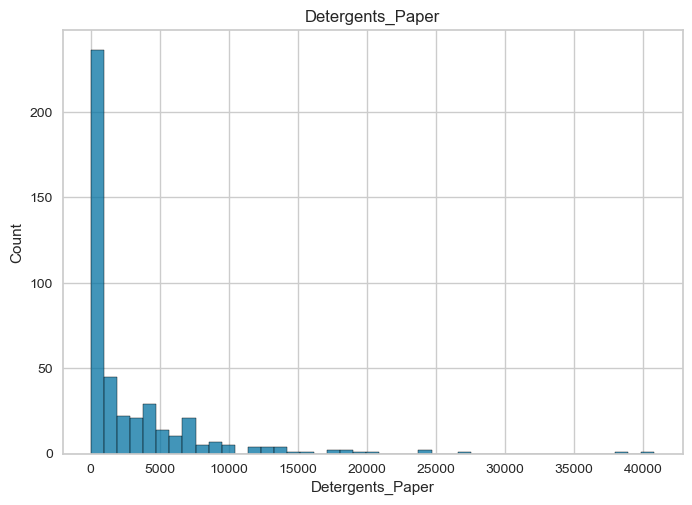

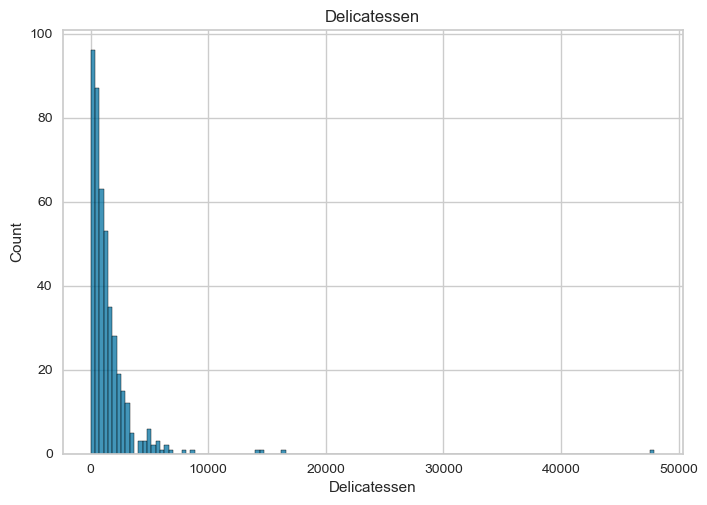

In [19]:
for feature in features:
    if feature == 'Channel' or feature == 'Region':
        sns.countplot(data=df, x=feature)
        plt.title(feature)
        plt.show()
    else:
        sns.histplot(data=df, x=feature)
        plt.title(feature)
        plt.show()


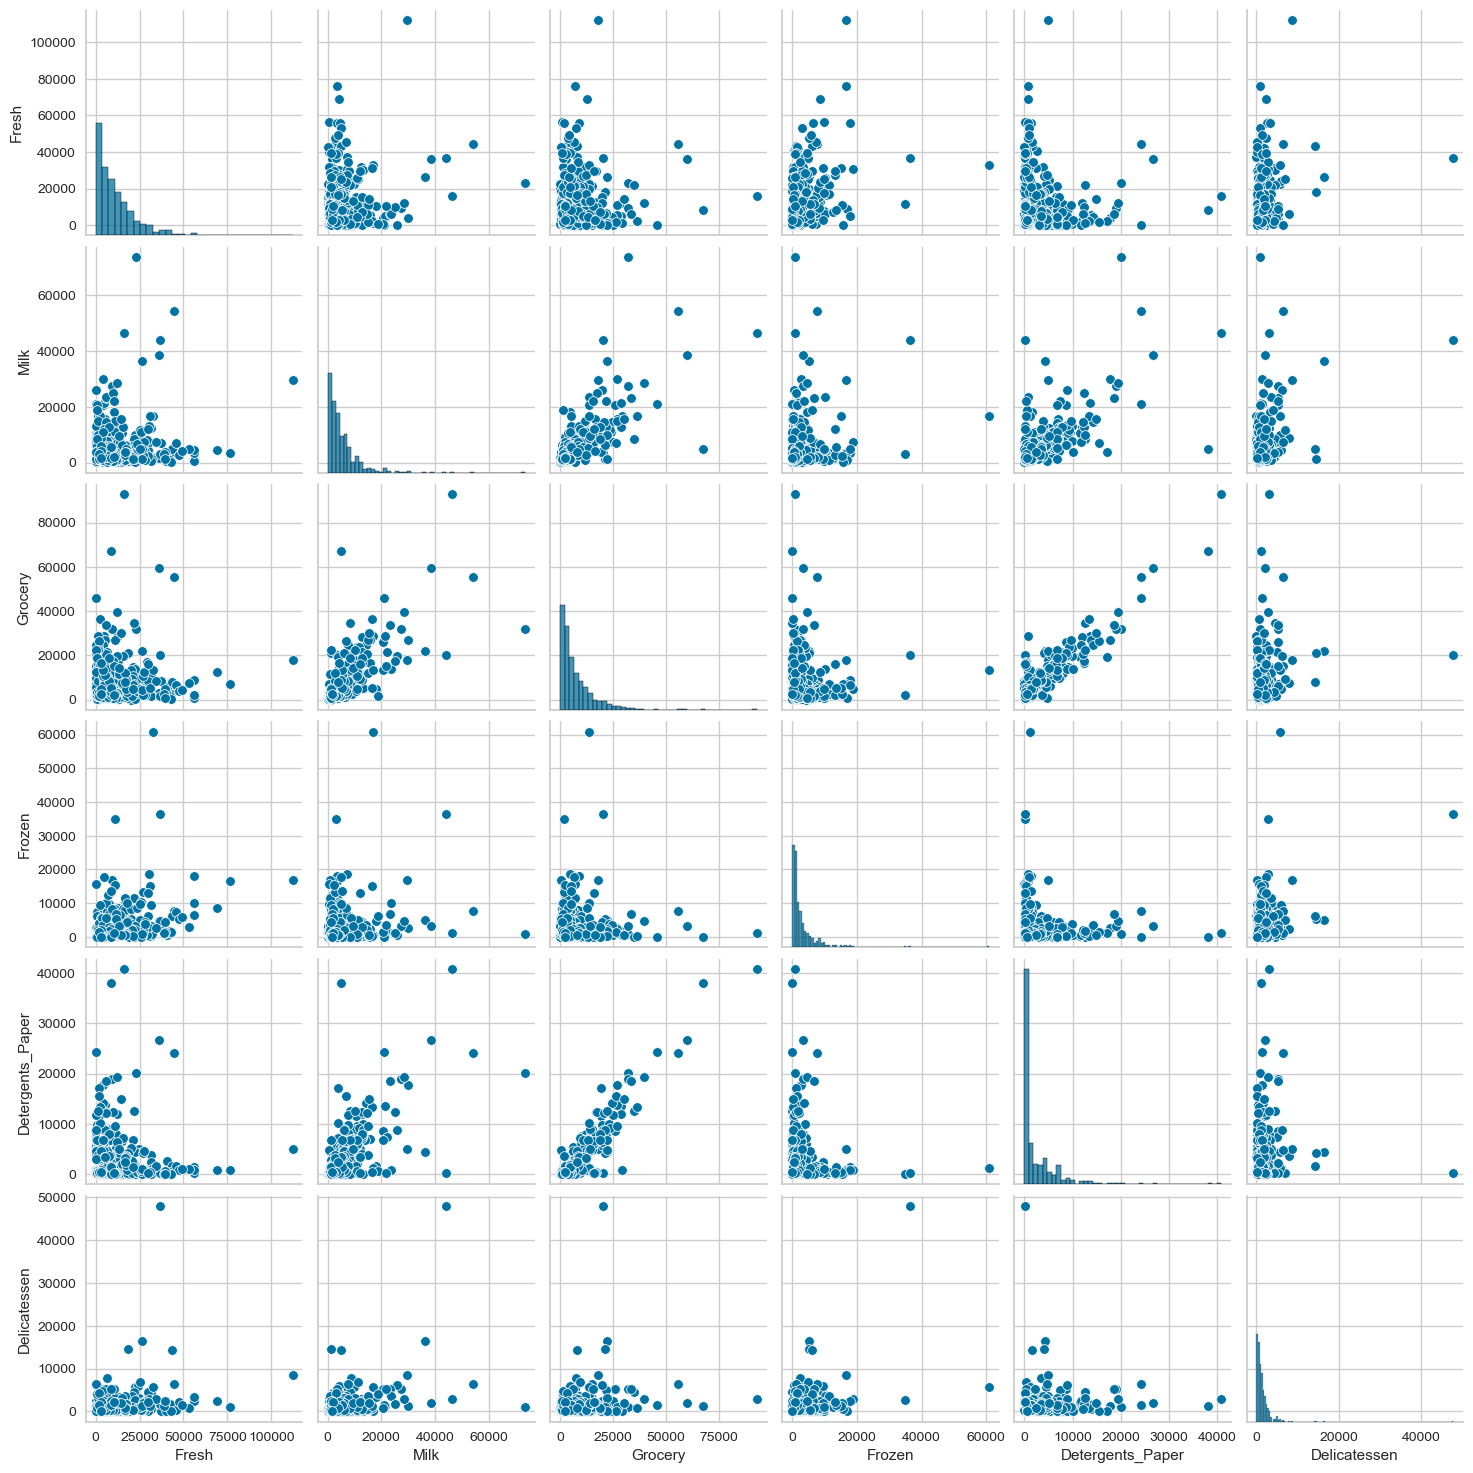

In [20]:
# Matrice de visualisation
sns.pairplot(df)

# <font color='red'>Tache 3: Analyse en Composantes Principales(ACP)</font>
## <font color='green'> ACP linéaire</font>

In [21]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776


In [22]:
# Dataframe des variables numeriques de df
data = df.drop(['Channel', 'Region'], axis=1)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [23]:
# Standisation
scaler = StandardScaler()
data= scaler.fit_transform(data)
type(data)

numpy.ndarray

In [24]:
# afficher le data 
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [25]:
#Souvagarde du tableau numy data
np.save('training_data.npy', data)

In [26]:
#application de L'ACP(2 Composante)
pca= PCA(n_components= 2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [27]:
#affiche le resulta
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

Text(0.5, 1.0, 'PC1 vs PC2')

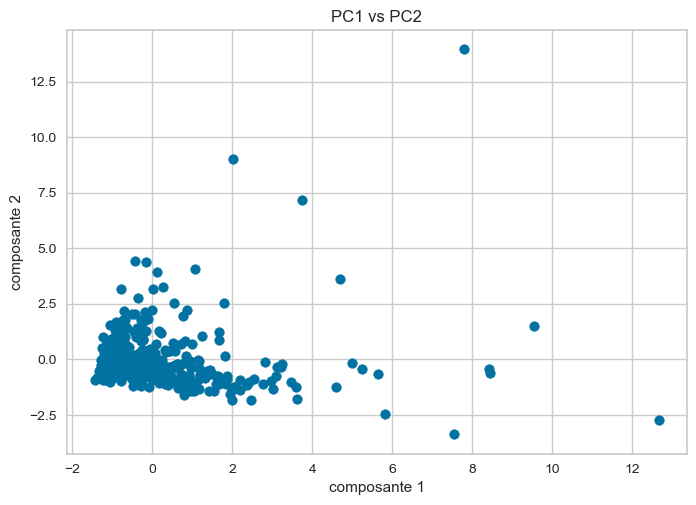

In [28]:
#Visualisation des pricipale
plt.scatter(res_pca[:,0], res_pca[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("PC1 vs PC2")

In [29]:
# Coefficient de corrélationde pearson obtenu aprés ACP


In [30]:
pearsonr(res_pca[:,0], res_pca[:,1])


PearsonRResult(statistic=1.6653345369377348e-16, pvalue=0.9999999999999951)

# ACP non-lineare 

In [31]:
# chargement des données d'entrainement
data =np.load('training_data.npy')

In [32]:
#KPCA avc noyau 'rbr'


# Maintenant, vous pouvez utiliser KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
res_kpca_rbf = kpca.fit_transform(data)
type(res_kpca_rbf)

numpy.ndarray

In [33]:
res_kpca_rbf

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

Text(0.5, 1.0, 'PC1 vs PC2')

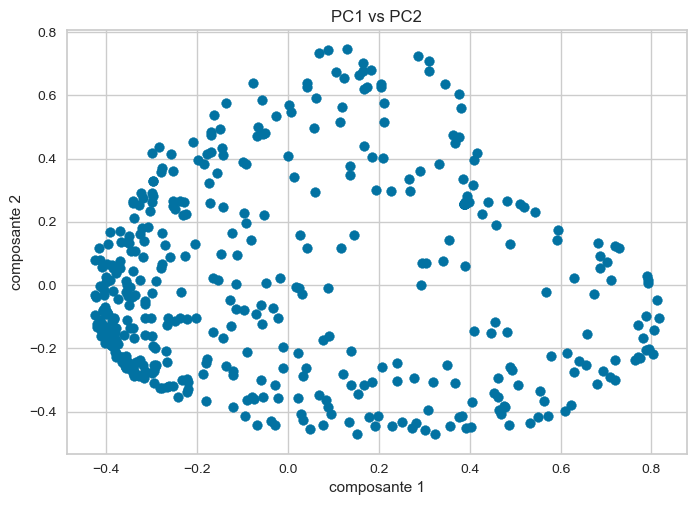

In [34]:
#Visualisation des  composantes pricipale
plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("PC1 vs PC2")

In [35]:
# Coefficient de corrélationde pearson obtenu aprés kACP kernel='rbf'
pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:,1])[0]

-4.5102810375396984e-17

In [36]:
pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:,1])[0] <pearsonr(res_pca[:,0], res_pca[:,1])[0]

True

In [37]:
df['x_kpca_rbf'] = res_kpca_rbf[:,0]
df['y_kpca_rbf'] = res_kpca_rbf[:,1]

In [38]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf
0,Retail,other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReca,other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


# <font color='red'>Tache 5: Clustering K-Means avec la methode du coude</font>
## <font color='green'> ACP linéaire</font>

In [39]:
# Clusteing avec 5 clusters
cluster_model = KMeans(n_clusters = 5)
cluster_model.fit(res_kpca_rbf)
clusters = cluster_model.predict(res_kpca_rbf)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [40]:
# afficher des clusters
clusters

array([2, 2, 1, 3, 1, 0, 0, 2, 0, 4, 2, 0, 1, 4, 1, 0, 2, 0, 1, 0, 3, 0,
       1, 1, 1, 0, 0, 0, 4, 1, 3, 0, 3, 1, 0, 2, 1, 4, 4, 1, 1, 3, 4, 4,
       2, 4, 4, 1, 2, 4, 0, 0, 1, 2, 3, 0, 1, 4, 0, 2, 2, 1, 2, 4, 0, 1,
       2, 2, 0, 0, 3, 1, 3, 3, 2, 3, 0, 4, 0, 0, 0, 4, 2, 3, 0, 1, 1, 1,
       3, 3, 0, 3, 1, 1, 2, 0, 2, 0, 0, 3, 4, 4, 2, 1, 0, 3, 2, 4, 2, 4,
       0, 4, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 2, 1, 1, 3, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 3, 1, 1, 3, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 4, 4, 3, 2, 4, 2, 0, 3, 4, 2, 4, 2, 0, 0, 0, 4, 4, 2, 4, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 3, 0, 0, 4, 0, 3, 1, 2,
       0, 0, 4, 4, 1, 0, 0, 4, 0, 2, 2, 4, 3, 1, 0, 2, 2, 4, 4, 3, 4, 0,
       3, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 2, 3, 0, 3, 0, 0, 3, 0, 1, 1, 3,
       3, 0, 2, 4, 0, 3, 0, 0, 0, 1, 3, 1, 1, 3, 0, 0, 1, 1, 0, 3, 3, 0,
       4, 1, 4, 3, 4, 3, 0, 0, 2, 1, 0, 0, 1, 1, 3, 2, 0, 0, 1, 1, 1, 1,
       0, 3, 3, 1, 0, 0, 0, 4, 3, 0, 3, 0, 2, 0, 0,

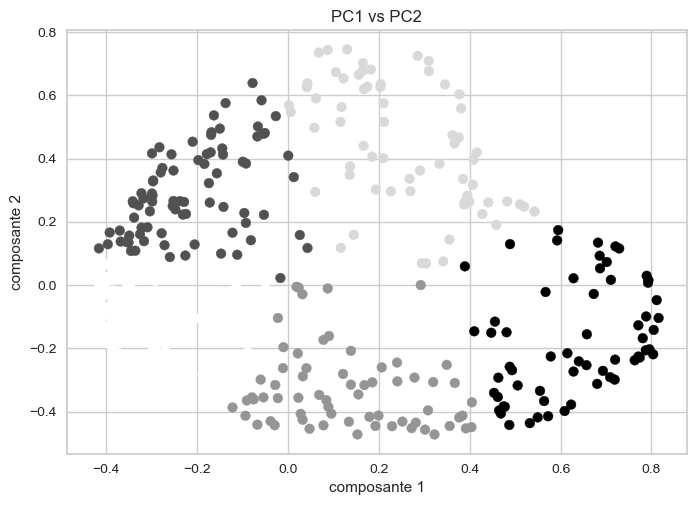

In [41]:
#visualitin des clusters
plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1], c=clusters)
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("PC1 vs PC2")
plt.show()

In [42]:
#installions de yellilowbric

In [43]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

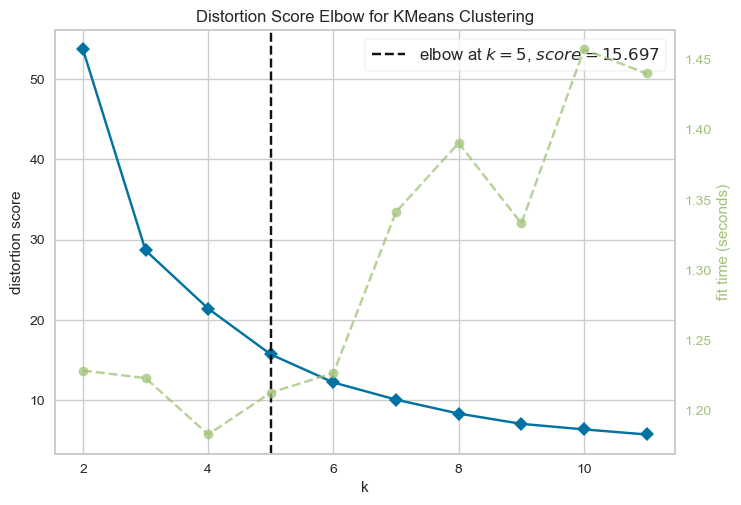

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
#methode de coude
kmeans= KMeans()
visualizer= KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(res_kpca_rbf)
visualizer.show()

In [45]:
# ajouter des clusters à df et sauvegarder au format csv
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

In [46]:
df = pd.read_csv('data_with_clusters.csv')

In [47]:
df.head()

,Unnamed: 0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,0,Retail,other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,2
1,1,Retail,other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,2
2,2,Retail,other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,1
3,3,HoReca,other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,4,Retail,other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,1


In [48]:
df['cluster_kpca_rbf'].unique()

array([2, 1, 3, 0, 4], dtype=int64)

In [49]:
#centroides
df.groupby('cluster_kpca_rbf')[features].mean()

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_3200\813345368.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster_kpca_rbf')[features].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster_kpca_rbf,,,,,,
0,6538.062893,2390.238994,2977.622642,1705.238994,693.496855,844.452830
1,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
2,5010.815385,6713.061538,9540.538462,1217.676923,3856.338462,1197.492308
3,17569.506173,2351.679012,3157.061728,4259.222222,554.802469,1123.481481
4,5357.064516,11624.112903,19493.741935,1360.161290,8571.064516,1598.661290


In [50]:

df.groupby(['cluster_kpca_rbf', 'Channel', 'Region'])[features].mean()

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_3200\3566759602.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['cluster_kpca_rbf', 'Channel', 'Region'])[features].mean()


Fresh          Milk       Grocery  \
cluster_kpca_rbf Channel Region                                             
0                HoReca  Lisbon   6580.461538   2444.615385   2693.269231   
                         Porto    7070.600000   1708.266667   4009.933333   
                         other    6021.242991   2297.859813   2595.775701   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Porto   10708.666667   3779.666667   6193.333333   
                         other   11887.428571   4446.714286   5953.571429   
1                HoReca  Lisbon  31168.666667   9313.333333   7786.666667   
                         Porto   16360.000000   8558.500000  10323.500000   
                         other   34887.564103   6569.153846   5962.948718   
                 Retail  Lisbon   9126.500000  25729.500000  36640.000000   
                         Porto   17490.000000   4241.666667  26943.666667   
                         other   23057.333333  22303.388889  25736.555556   
2                HoReca  Lisbon   3218.333333   7438.166667   7476.500000   
                         other    3332.312500   5690.250000   8992.187500   
                 Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                         Porto    3295.666667   7600.333333   9534.000000   
                         other    6374.567568   7013.243243  10133.918919   
3                HoReca  Lisbon  16912.176471   1504.000000   2178.823529   
                         Porto   17039.636364   1979.818182   3843.454545   
                         other   18005.255319   2370.978723   2898.021277   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         other   17521.500000   4948.500000   6342.500000   
4                HoReca  Lisbon   2806.000000  10765.000000  15538.000000   
                         other   11908.500000  15602.500000  14858.000000   
                 Retail  Lisbon   3337.300000  10983.100000  21127.900000   
                         Porto    4402.300000  12776.000000  18218.700000   
                         other    5849.205128  11311.128205  19740.820513   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_rbf Channel Region                                                
0                HoReca  Lisbon   1858.769231        860.153846    621.769231  
                         Porto    1986.000000        444.933333    775.200000  
                         other    1663.766355        499.775701    908.700935  
                 Retail  Lisbon   5612.000000        788.000000   1360.000000  
                         Porto     898.666667       2860.666667    930.000000  
                         other     954.857143       2626.000000    727.571429  
1                HoReca  Lisbon   7238.666667        739.444444   2997.555556  
                         Porto   38235.000000        643.500000   3079.500000  
                         other    9338.282051        859.282051   3836.794872  
                 Retail  Lisbon   5741.000000      19002.000000   3995.500000  
                         Porto    4351.666667      14181.666667   2280.000000  
                         other    2316.277778      11587.833333   3950.888889  
2                HoReca  Lisbon   1071.666667       2718.500000    960.000000  
                         other    1080.687500       3090.312500   1139.812500  
                 Retail  Lisbon   1662.000000       5195.666667    793.000000  
                         Porto     699.000000       4894.333333    601.000000  
                         other    1306.621622       4179.351351   1342.108108  
3                HoReca  Lisbon   3719.529412        289.588235   1137.647059  
                         Porto    4963.727273        505.000000   1198.000000  
                         other    4368.574468        514.808511   1026.404255  
                 Retail  Lisbon   5040.000000 